In [1]:
import torch
from dpm.models import QuadraticDiscriminantAnalysis
from dpm.distributions import Normal
from dpm.visualize import plot_stats, plot_models, plot_model, plot_hist

In [2]:
y = torch.cat((torch.zeros(1000), torch.ones(2000))).view(-1, 1)
y.shape

torch.Size([3000, 1])

In [3]:
x_model_0 = Normal(torch.zeros(10)+4., torch.eye(10)*2 + 4)
x_model_1 = Normal(torch.zeros(10)-2, torch.eye(10)*5 - 0.2)
# plot_models(x_model_0, x_model_1)
x = torch.cat((x_model_0.sample(1000).detach(), x_model_1.sample(2000).detach()), dim=0)
x.shape

torch.Size([3000, 10])

In [4]:
model = QuadraticDiscriminantAnalysis(n_features=10)

In [5]:
model.log_prob(x, y)

tensor([ -42.0835,  -99.6571, -128.7584,  ...,  -57.1995,  -33.5829,
         -51.3436], grad_fn=<SumBackward2>)

In [6]:
stats = model.fit(x, y)

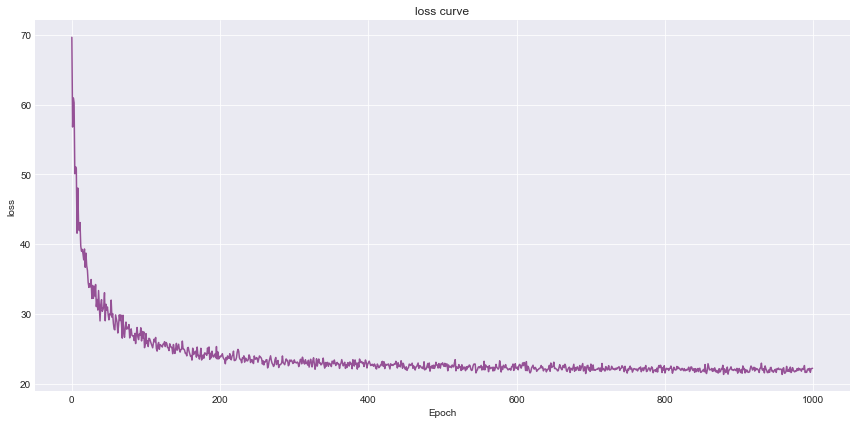

In [7]:
plot_stats(stats)

In [8]:
model.y_dist.probs

tensor([0.3219, 0.6781], grad_fn=<SoftmaxBackward>)

In [9]:
(model.predict(x) == y.long()).float().mean()

tensor(0.9923)

In [10]:
model.x_dist[0].loc

Parameter containing:
tensor([2.5530, 2.3455, 2.3868, 2.5078, 2.4132, 2.4781, 2.4248, 2.5520, 2.4039,
        2.4146], requires_grad=True)

In [11]:
model.x_dist[1].loc

Parameter containing:
tensor([-1.8537, -1.7782, -2.1860, -1.5414, -2.0817, -1.4099, -2.0512, -2.0082,
        -2.1662, -2.1189], requires_grad=True)

In [12]:
X = model.sample(5)
print(X)

tensor([[-2.0498, -2.0596, -3.2850,  0.1923, -2.8076, -0.5972, -3.5796, -0.1907,
         -4.1099,  0.0391],
        [ 1.7177, -4.1469, -1.2875,  0.4794, -4.7816, -4.5633,  0.6666, -1.6065,
         -2.0568, -6.9258],
        [-1.2988, -0.7413, -3.3676, -5.4884, -0.2941, -2.9852,  1.7177, -2.3245,
         -3.1764, -0.9055],
        [-0.4090,  1.6055, -0.4034, -0.3359, -0.5583,  0.2069, -1.6359, -6.8502,
         -1.8327, -6.3267],
        [ 3.9899,  2.4210,  1.8879,  0.9970,  3.2784,  1.4350,  0.7609,  3.6815,
          3.2780,  2.2810]], grad_fn=<IndexBackward>)


In [13]:
model.predict(X)

tensor([[1],
        [1],
        [1],
        [1],
        [0]])

In [14]:
model.x_dist[1].scale

tensor([[ 5.1804, -0.1207, -0.3950,  0.0306, -0.3288,  0.0687, -0.1378, -0.0167,
         -0.1629, -0.4612],
        [-0.1207,  5.0708, -0.4910,  0.0693, -0.3837,  0.3988, -0.2862, -0.3969,
         -0.4042, -0.2435],
        [-0.3950, -0.4910,  4.8604, -0.6713, -0.1775, -0.7050, -0.3157, -0.0453,
          0.0187, -0.0568],
        [ 0.0306,  0.0693, -0.6713,  5.8679, -0.1261,  1.0233, -0.2532, -0.3325,
         -0.5395, -0.1873],
        [-0.3288, -0.3837, -0.1775, -0.1261,  5.2126,  0.0118, -0.3364, -0.2610,
         -0.2927, -0.2047],
        [ 0.0687,  0.3988, -0.7050,  1.0233,  0.0118,  6.1396, -0.3430, -0.4169,
         -0.6707, -0.3504],
        [-0.1378, -0.2862, -0.3157, -0.2532, -0.3364, -0.3430,  4.8549, -0.1436,
         -0.5050, -0.1808],
        [-0.0167, -0.3969, -0.0453, -0.3325, -0.2610, -0.4169, -0.1436,  4.9989,
         -0.1984, -0.1531],
        [-0.1629, -0.4042,  0.0187, -0.5395, -0.2927, -0.6707, -0.5050, -0.1984,
          5.3255,  0.0263],
        [-0.4612, -

In [15]:
# plot_hist(model.sample(5000).detach())